# Required libraries for analysis and model development


In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.ensemble import GradientBoostingRegressor
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Load the dataset for analysis


In [2]:

# Cell 2: Load Dataset
data = pd.read_csv('/content/XAU_1d_data_2004_to_2024-09-20.csv')



# Display the first few rows of the dataset


In [3]:

# Cell 3: Initial Data Overview
print("Initial Data Overview:")
print(data.head())



Initial Data Overview:
         Date   Time   Open   High    Low  Close  Volume
0  2004.06.11  00:00  384.0  384.8  382.8  384.1     272
1  2004.06.14  00:00  384.3  385.8  381.8  382.8    1902
2  2004.06.15  00:00  382.8  388.8  381.1  388.6    1951
3  2004.06.16  00:00  387.1  389.8  382.6  383.8    2014
4  2004.06.17  00:00  383.6  389.3  383.0  387.6    1568


# proper data types and handle missing values


In [4]:

# Cell 4: Data Cleaning and Preprocessing
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates

data.sort_values(by='Date', inplace=True)
data.reset_index(drop=True, inplace=True)

data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
# data['Change %'] = data['Change %'].str.replace('%', '').astype(float)
# data['Volume'] = data['Volume'].str.replace('K', 'e3').str.replace('M', 'e6')
# data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

data.dropna(subset=['Close'], inplace=True)

print("Data after preprocessing:")
print(data.info())



Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5205 non-null   datetime64[ns]
 1   Time    5205 non-null   object        
 2   Open    5205 non-null   float64       
 3   High    5205 non-null   float64       
 4   Low     5205 non-null   float64       
 5   Close   5205 non-null   float64       
 6   Volume  5205 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 284.8+ KB
None


# Perform seasonal decomposition of the time series


In [5]:

# Cell 5: Time Series Decomposition
def decompose_time_series(series, period):
    decomposition = seasonal_decompose(series, period=period, model='additive')
    return decomposition

try:
    period = 30  # Period based on data frequency
    decomposition = decompose_time_series(data['Close'], period)

    data['Trend'] = decomposition.trend
    data['Seasonal'] = decomposition.seasonal
    data['Residual'] = decomposition.resid
    data.dropna(subset=['Trend', 'Seasonal', 'Residual'], inplace=True)

    print("Decomposition completed successfully.")
except Exception as e:
    print(f"Error during decomposition: {e}")



Decomposition completed successfully.


In [6]:

# Cell 5: Time Series Decomposition
def decompose_time_series(series, period):
    decomposition = seasonal_decompose(series, period=period, model='additive')
    return decomposition

try:
    period = 30  # Period based on data frequency
    decomposition = decompose_time_series(data['Open'], period)

    data['Trend_Open'] = decomposition.trend
    data['Seasonal_Open'] = decomposition.seasonal
    data['Residual_Open'] = decomposition.resid
    data.dropna(subset=['Trend_Open', 'Seasonal_Open', 'Residual_Open'], inplace=True)

    print("Decomposition completed successfully.")
except Exception as e:
    print(f"Error during decomposition: {e}")



Decomposition completed successfully.


In [7]:

# Cell 5: Time Series Decomposition
def decompose_time_series(series, period):
    decomposition = seasonal_decompose(series, period=period, model='additive')
    return decomposition

try:
    period = 30  # Period based on data frequency
    decomposition = decompose_time_series(data['Low'], period)

    data['Trend_Low'] = decomposition.trend
    data['Seasonal_Low'] = decomposition.seasonal
    data['Residual_Low'] = decomposition.resid
    data.dropna(subset=['Trend_Low', 'Seasonal_Low', 'Residual_Low'], inplace=True)

    print("Decomposition completed successfully.")
except Exception as e:
    print(f"Error during decomposition: {e}")



Decomposition completed successfully.


In [8]:

# Cell 5: Time Series Decomposition
def decompose_time_series(series, period):
    decomposition = seasonal_decompose(series, period=period, model='additive')
    return decomposition

try:
    period = 30  # Period based on data frequency
    decomposition = decompose_time_series(data['High'], period)

    data['Trend_High'] = decomposition.trend
    data['Seasonal_High'] = decomposition.seasonal
    data['Residual_High'] = decomposition.resid
    data.dropna(subset=['Trend_High', 'Seasonal_High', 'Residual_High'], inplace=True)

    print("Decomposition completed successfully.")
except Exception as e:
    print(f"Error during decomposition: {e}")



Decomposition completed successfully.




---



# Split data into training and testing sets


In [9]:

# Cell 6: Prepare Features for Models
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

X_train = train[['High', 'Open', 'Low']].values
X_test = test[['High', 'Open', 'Low']].values

y_train = train[['Close']].values.flatten()
y_test = test[['Close']].values.flatten()

trend_train = train[['Trend']].values.flatten()
trend_test = test[['Trend']].values.flatten()

seasonal_train = train[['Seasonal']].values.flatten()
seasonal_test = test[['Seasonal']].values.flatten()

residual_train = train[['Residual']].values.flatten()
residual_test = test[['Residual']].values.flatten()

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")



Shape of X_train: (4068, 3)
Shape of X_test: (1017, 3)
Shape of y_train: (4068,)
Shape of y_test: (1017,)


In [10]:
print(data.columns)


Index(['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trend',
       'Seasonal', 'Residual', 'Trend_Open', 'Seasonal_Open', 'Residual_Open',
       'Trend_Low', 'Seasonal_Low', 'Residual_Low', 'Trend_High',
       'Seasonal_High', 'Residual_High'],
      dtype='object')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0164 - val_loss: 9.3083e-04
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.3209e-05 - val_loss: 3.4901e-04
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.4134e-05 - val_loss: 4.1615e-04
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.4677e-05 - val_loss: 2.5376e-04
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 5.4050e-05 - val_loss: 4.2337e-04
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.3645e-05 - val_loss: 3.3907e-04
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.4758e-05 - val_loss: 2.0529e-04
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.9263e-05 - val_loss: 2.3055e-04
Epoch 9/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 4.8994e-05 - val_loss: 1.9559e-04
Epoch 10/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 6.1370e-05 - val_loss: 2.0386e-04
Epoch 11/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step 

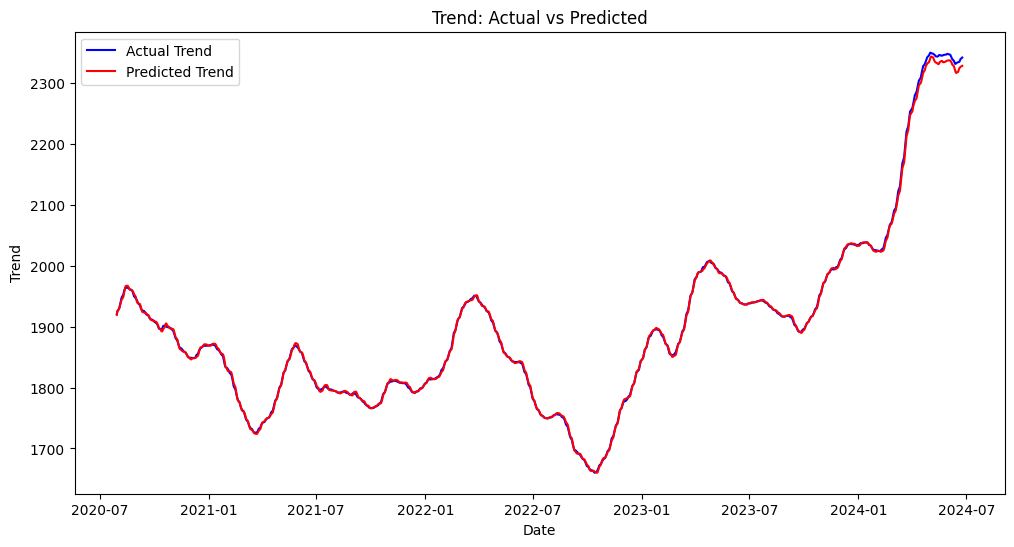

In [14]:


# # Define separate scalers
# scaler_features = MinMaxScaler()
# scaler_trend = MinMaxScaler()

# # Scale features and target separately
# features_scaled = scaler_features.fit_transform(data[['Trend_High', 'Trend_Open', 'Trend_Low']])
# trend_scaled = scaler_trend.fit_transform(data[['Trend']])

# # Combine scaled features and trend
# data_scaled = np.concatenate([features_scaled, trend_scaled], axis=1)

# # Split data into train and test sets
# train_size = int(len(data_scaled) * 0.8)
# train, test = data_scaled[:train_size], data_scaled[train_size:]

# # Define time_steps
# time_steps = 10

# # Prepare data for LSTM
# X_train, y_train = create_lstm_data(train, time_steps)
# X_test, y_test = create_lstm_data(test, time_steps)

# # Build, train, and predict as before
# trend_model = build_lstm_model(X_train.shape)
# trend_history = trend_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# predicted_trend = trend_model.predict(X_test)

# # Rescale predicted trend back to original scale
# predicted_trend_rescaled = scaler_trend.inverse_transform(predicted_trend)
# y_test_rescaled = scaler_trend.inverse_transform(y_test)

# # Plot results
# plt.figure(figsize=(12, 6))
# plt.plot(data['Date'].iloc[train_size + time_steps:], y_test_rescaled, label='Actual Trend', color='blue')
# plt.plot(data['Date'].iloc[train_size + time_steps:], predicted_trend_rescaled, label='Predicted Trend', color='red')
# plt.xlabel('Date')
# plt.ylabel('Trend')
# plt.title('Trend: Actual vs Predicted')
# plt.legend()
# plt.show()

# # Evaluate model performance
# mse = mean_squared_error(y_test_rescaled, predicted_trend_rescaled)
# mae = mean_absolute_error(y_test_rescaled, predicted_trend_rescaled)
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Mean Absolute Error (MAE): {mae}")

scaler_features = MinMaxScaler()
scaler_trend = MinMaxScaler()

features_scaled = scaler_features.fit_transform(data[['Trend_High', 'Trend_Open', 'Trend_Low']])
trend_scaled = scaler_trend.fit_transform(data[['Trend']])

# Combine scaled features and target
data_scaled = np.concatenate([features_scaled, trend_scaled], axis=1)

# Define a function to create LSTM-ready data
def create_lstm_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :-1])
        y.append(data[i + time_steps, -1])
    return np.array(X), np.array(y)

# Define time_steps and split data
time_steps = 10
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Create LSTM input data
X_train, y_train = create_lstm_data(train, time_steps)
X_test, y_test = create_lstm_data(test, time_steps)

# Reshape y_train and y_test to (n, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(input_shape[1], input_shape[2])))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model
trend_model = build_lstm_model(X_train.shape)
trend_history = trend_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict and rescale predicted trend back to original scale
predicted_trend = trend_model.predict(X_test)
predicted_trend_rescaled = scaler_trend.inverse_transform(predicted_trend)
y_test_rescaled = scaler_trend.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'].iloc[train_size + time_steps:], y_test_rescaled, label='Actual Trend', color='blue')
plt.plot(data['Date'].iloc[train_size + time_steps:], predicted_trend_rescaled, label='Predicted Trend', color='red')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend: Actual vs Predicted')
plt.legend()
plt.show()

# Evaluate model performance
mse = mean_squared_error(y_test_rescaled, predicted_trend_rescaled)
mae = mean_absolute_error(y_test_rescaled, predicted_trend_rescaled)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Train and plot LSTM for trend prediction


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Prepare Data
def create_lstm_data(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :-1])  # Features
        y.append(data[i + time_steps, -1])    # Target (Trend)
    return np.array(X), np.array(y).reshape(-1, 1)  # Ensure y is of shape (n_samples, 1)

# Load dataset (Assume 'data' is already loaded)
# Example: data = pd.read_csv('your_dataset.csv')

# Columns: ['Date', 'Trend_High', 'Trend_Open', 'Trend_Low', 'Trend']
scaler = MinMaxScaler()

# Scale features and target
data_scaled = scaler.fit_transform(data[['Trend_High', 'Trend_Open', 'Trend_Low', 'Trend']])

# Split data into train and test sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Define time_steps
time_steps = 10

# Prepare data for LSTM
X_train, y_train = create_lstm_data(train, time_steps)
X_test, y_test = create_lstm_data(test, time_steps)

print(f"Shape of X_train: {X_train.shape}")  # Expected: (n_samples, time_steps, 3)
print(f"Shape of y_train: {y_train.shape}")  # Expected: (n_samples, 1)
print(f"Shape of X_test: {X_test.shape}")    # Expected: (n_samples, time_steps, 3)
print(f"Shape of y_test: {y_test.shape}")    # Expected: (n_samples, 1)

# Step 2: Build LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(input_shape[1], input_shape[2])))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

trend_model = build_lstm_model(X_train.shape)

# Step 3: Train the Model
trend_history = trend_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Step 4: Predict and Rescale
predicted_trend = trend_model.predict(X_test)
# Rescale predicted values back to original scale
predicted_trend_rescaled = scaler.inverse_transform(
    np.concatenate([X_test[:, -1, :-1], predicted_trend], axis=1)
)[:, -1]

y_test_rescaled = scaler.inverse_transform(
    np.concatenate([X_test[:, -1, :-1], y_test], axis=1)
)[:, -1]

# Step 5: Plot Results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'].iloc[train_size + time_steps:], y_test_rescaled, label='Actual Trend', color='blue')
plt.plot(data['Date'].iloc[train_size + time_steps:], predicted_trend_rescaled, label='Predicted Trend', color='red')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend: Actual vs Predicted')
plt.legend()
plt.show()

# Step 6: Evaluate Model Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_rescaled, predicted_trend_rescaled)
mae = mean_absolute_error(y_test_rescaled, predicted_trend_rescaled)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


# Train and plot Gradient Boosting for seasonality


In [21]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming 'data' already includes the decomposed columns ('Trend', 'Seasonal', 'Residual')
features = data[['Seasonal_Open',
'Seasonal_Low', 'Seasonal_High']]

# Target (seasonality values or another column you want to predict)
target = data['Seasonal']

# Normalize features
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)

# Normalize target (seasonality values)
scaler_seasonal = MinMaxScaler()
target_scaled = scaler_seasonal.fit_transform(target.values.reshape(-1, 1))

# Create lagged features (time_steps as context window)
time_steps = 30  # Example: Use the past 30 steps for prediction
X, y = [], []
for i in range(time_steps, len(features_scaled)):
    X.append(features_scaled[i-time_steps:i, :])  # Features for the past `time_steps`
    y.append(target_scaled[i])                   # Target at time `i`

X, y = np.array(X), np.array(y)

# Train-test split
train_size = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4044, 30, 3)
(4044, 1)
(1011, 30, 3)
(1011, 1)


In [25]:
# Keep the shape as (samples, time_steps, n_features)
print(f"Before Reshaping: {X_train.shape}")
X_train = X_train.reshape(X_train.shape[0], time_steps, -1)
X_test = X_test.reshape(X_test.shape[0], time_steps, -1)

# After reshaping
print(f"After Reshaping: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")


Before Reshaping: (4044, 90)
After Reshaping: (4044, 30, 3)
y_train.shape: (4044, 1)
X_test.shape: (1011, 30, 3)
y_test.shape: (1011, 1)


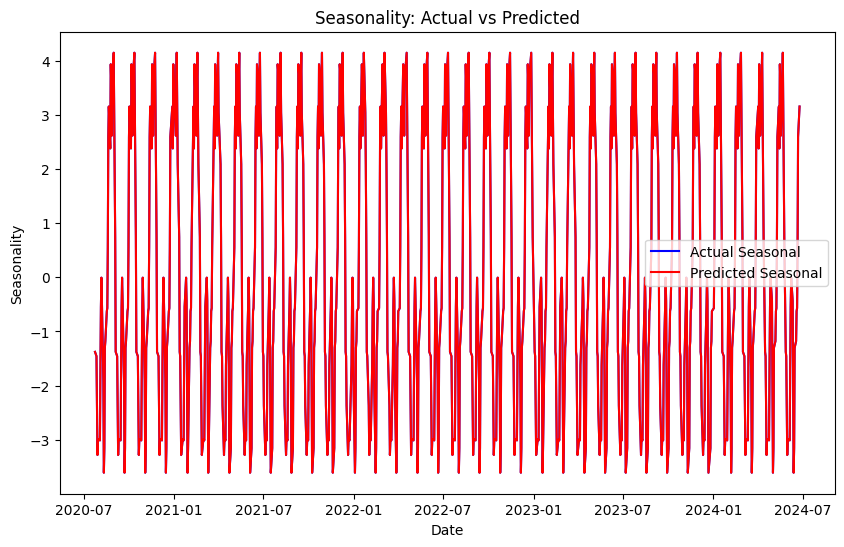

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Train Gradient Boosting Regressor
seasonal_model = GradientBoostingRegressor()
seasonal_model.fit(X_train.reshape(X_train.shape[0], -1), y_train.ravel())  # Flatten input for GBM

# Predict seasonality
predicted_seasonal = seasonal_model.predict(X_test.reshape(X_test.shape[0], -1))

# Rescale predicted values back to original scale
predicted_seasonal_rescaled = scaler_seasonal.inverse_transform(predicted_seasonal.reshape(-1, 1))
y_test_rescaled = scaler_seasonal.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[train_size + time_steps:], y_test_rescaled, label='Actual Seasonal', color='blue')
plt.plot(data['Date'].iloc[train_size + time_steps:], predicted_seasonal_rescaled, label='Predicted Seasonal', color='red')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.title('Seasonality: Actual vs Predicted')
plt.legend()
plt.show()


# Train and plot Gradient Boosting for residuals


Before Reshaping: (4044, 30, 3)
After Reshaping: (4044, 90)


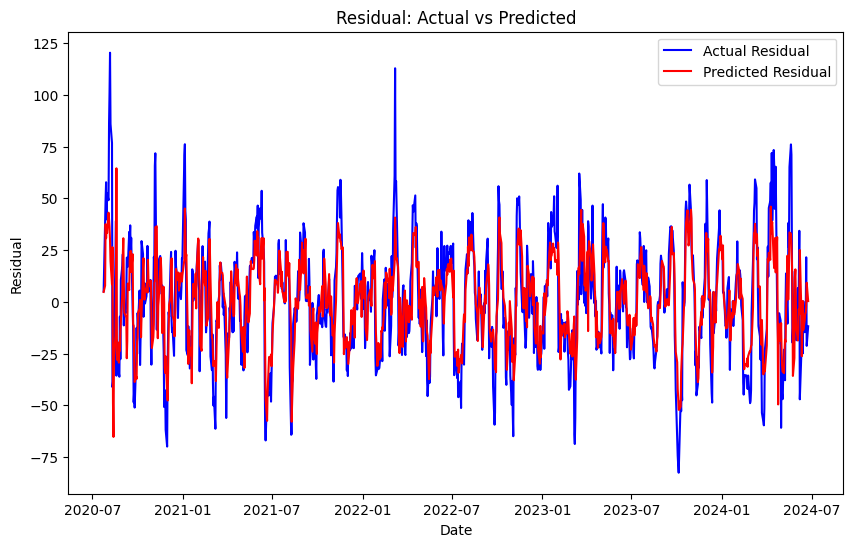

In [33]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Assuming 'data' already includes the decomposed columns ('Trend', 'Seasonal', 'Residual')
features = data[['Residual_Open', 'Residual_Low', 'Residual_High']]

# Target (residuals or another column you want to predict)
target = data['Residual']

# Normalize features
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)

# Normalize target (residual values)
scaler_residual = MinMaxScaler()
target_scaled = scaler_residual.fit_transform(target.values.reshape(-1, 1))

# Create lagged features (time_steps as context window)
time_steps = 30  # Example: Use the past 30 steps for prediction
X, y = [], []
for i in range(time_steps, len(features_scaled)):
    X.append(features_scaled[i-time_steps:i, :])  # Features for the past `time_steps`
    y.append(target_scaled[i])                   # Target at time `i`

X, y = np.array(X), np.array(y)

# Train-test split
train_size = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape X_train and X_test to 2D for GradientBoostingRegressor
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

print(f"Before Reshaping: {X_train.shape}")
print(f"After Reshaping: {X_train_2d.shape}")

# Train Gradient Boosting Regressor for Residuals
residual_model = GradientBoostingRegressor()
residual_model.fit(X_train_2d, y_train.ravel())  # Fit the model with reshaped data

# Predict residuals
predicted_residual = residual_model.predict(X_test_2d)  # Predict with reshaped data

# Rescale residual predictions back to original scale if needed
predicted_residual_rescaled = scaler_residual.inverse_transform(predicted_residual.reshape(-1, 1))
y_test_rescaled = scaler_residual.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[train_size + time_steps:], y_test_rescaled, label='Actual Residual', color='blue')
plt.plot(data['Date'].iloc[train_size + time_steps:], predicted_residual_rescaled, label='Predicted Residual', color='red')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual: Actual vs Predicted')
plt.legend()
plt.show()


# Plot final predictions and calculate errors


In [35]:
# Check the shapes of the prediction arrays
print(f"Shape of predicted_trend: {predicted_trend.shape}")
print(f"Shape of predicted_seasonal: {predicted_seasonal.shape}")
print(f"Shape of predicted_residual: {predicted_residual.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Ensure the arrays have the same length
# Trim or slice if necessary (assuming y_test is the reference)
predicted_trend = predicted_trend[:len(y_test)]
predicted_seasonal = predicted_seasonal[:len(y_test)]
predicted_residual = predicted_residual[:len(y_test)]

# Now combine the predictions
final_prediction = predicted_trend.flatten() + predicted_seasonal + predicted_residual

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], y_test, label='Actual Price', color='blue')
plt.plot(test['Date'], final_prediction, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price: Actual vs Predicted')
plt.legend()
plt.show()

# Plot prediction errors
errors = final_prediction - y_test
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], errors, label='Prediction Errors', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Error')
plt.title('Prediction Errors over Time')
plt.legend()
plt.show()

# Calculate performance metrics
mse = mean_squared_error(y_test, final_prediction)
mae = mean_absolute_error(y_test, final_prediction)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Shape of predicted_trend: (1007, 1)
Shape of predicted_seasonal: (1011,)
Shape of predicted_residual: (1011,)
Shape of y_test: (1011, 1)


ValueError: operands could not be broadcast together with shapes (1007,) (1011,) 

# Generate and save future predictions


In [ ]:

# Cell 11: Future Predictions
def predict_future(days, model_trend, model_seasonal, model_residual, last_features):
    future_predictions = []
    current_features = last_features.copy()

    for _ in range(days):
        pred_trend = model_trend.predict(current_features.reshape(1, -1))
        pred_seasonal = model_seasonal.predict(current_features.reshape(1, -1))
        pred_residual = model_residual.predict(current_features.reshape(1, -1))

        total_prediction = pred_trend.flatten()[0] + pred_seasonal.flatten()[0] + pred_residual.flatten()[0]
        future_predictions.append(total_prediction)

        current_features = np.roll(current_features, -1)
        current_features[-1] = total_prediction

    return future_predictions

future_days = [3, 5, 7, 10, 14]
future_results = {}
last_features = X_test[-1]

for days in future_days:
    future_results[f"Prediction_{days}_Days"] = predict_future(
        days, trend_model, seasonal_model, residual_model, last_features
    )

max_length = max(len(v) for v in future_results.values())
for k, v in future_results.items():
    if len(v) < max_length:
        future_results[k].extend([None] * (max_length - len(v)))

future_df = pd.DataFrame(future_results)
future_df.to_excel('future_predictions.xlsx', index=False)
print("Future predictions saved to future_predictions.xlsx.")

